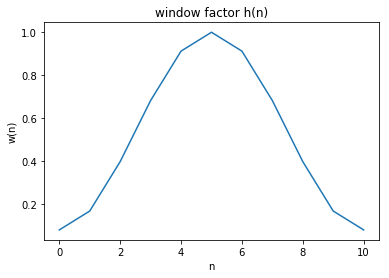

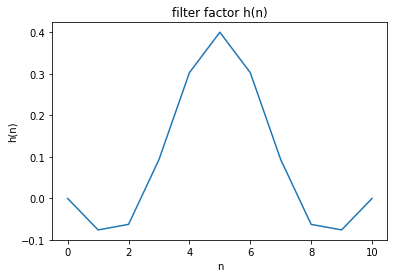

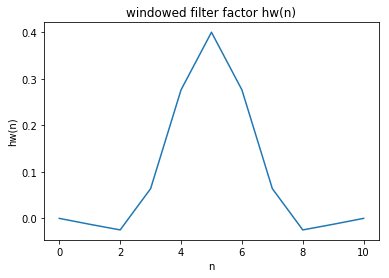

hw(n)= [3.2760405605641377e-18, -0.012703501824291023, -0.024812430222836662, 0.06381419731491805, 0.27613513947559976, 0.4, 0.27613513947559976, 0.06381419731491805, -0.024812430222836662, -0.012703501824291023, 3.2760405605641377e-18]

[ 0.      -0.0127  -0.02481  0.06381  0.27614  0.4      0.27614  0.06381
 -0.02481 -0.0127   0.     ]


In [8]:
# フィルタ係数を求める
# 4msで取っているので, サンプリング周波数は1/0.004 = 250 ?
# カットオフ周波数を工夫する必要あり

import numpy as np
import matplotlib.pyplot as plt

# sample_freq = 8000           # サンプリング周波数
sample_freq = 250
# cutoff_freq = 1000           # 遮断周波数（カットオフ周波数）(Hz)
cutoff_freq = 50
# cutoff_freq = 20
N = 11                       # インパルス応答の個数
T = 1/sample_freq            # 周期
g_delay = T * ((N-1) / 2)   # 群遅延
alpha = 0.540               # ハミング窓
omega_c = 2 * np.pi * cutoff_freq
abs_N = N + int(g_delay)
hw = [0] * abs_N
w = [0] * abs_N
h = [0] * abs_N

for i in range(int(g_delay), abs_N, 1):
    # 一般化ハミング窓の計算
    w[i] = alpha + ((1-alpha) * np.cos((2*np.pi*(i-(g_delay/T))) / (N-1)))
    
    # フィルタ係数の計算
    # 分母が0になる場合, sin(x)/x = 1 (x -> 0)を利用して計算
    if np.pi*(i-(g_delay/T)) == 0.0:
        h[i] = (omega_c*T) / np.pi
    else:
        h[i] = np.sin((i-(g_delay/T))*omega_c*T) / (np.pi*(i-(g_delay/T)))
    # 窓関数がかかったフィルタ係数hw(n)を計算
    hw[i] = w[i] * h[i]

plt.title('window factor h(n)')
plt.xlabel('n')
plt.ylabel('w(n)')
plt.plot(w)
plt.show()
    
plt.title('filter factor h(n)')
plt.xlabel('n')
plt.ylabel('h(n)')
plt.plot(h)
plt.show()
    
plt.title('windowed filter factor hw(n)')
plt.xlabel('n')
plt.ylabel('hw(n)')
plt.plot(hw)
plt.show()

print('hw(n)=', hw)
print()
print(np.round(hw, 5))